In [42]:
#import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from io import StringIO
from collections import Counter
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, ensemble

from sklearn.linear_model import SGDClassifier

from sklearn.datasets import make_classification

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

import re
import nltk

%matplotlib inline

/home/iman_lau/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#load in corpus

df = pd.read_csv('data/subset.csv')

# take a peek at the data
print(df.head())


          address                                         attributes  \
0  631 Bloor St W  {'BusinessParking': "{'garage': False, 'street...   
1  631 Bloor St W  {'BusinessParking': "{'garage': False, 'street...   
2  631 Bloor St W  {'BusinessParking': "{'garage': False, 'street...   
3  631 Bloor St W  {'BusinessParking': "{'garage': False, 'street...   
4  631 Bloor St W  {'BusinessParking': "{'garage': False, 'street...   

              business_id      categories     city hours  is_open   latitude  \
0  9A2quhZLyWk0akUetBd8hQ  Food, Bakeries  Toronto   NaN        0  43.664378   
1  9A2quhZLyWk0akUetBd8hQ  Food, Bakeries  Toronto   NaN        0  43.664378   
2  9A2quhZLyWk0akUetBd8hQ  Food, Bakeries  Toronto   NaN        0  43.664378   
3  9A2quhZLyWk0akUetBd8hQ  Food, Bakeries  Toronto   NaN        0  43.664378   
4  9A2quhZLyWk0akUetBd8hQ  Food, Bakeries  Toronto   NaN        0  43.664378   

   longitude            name           ...           stars_x state  cool  \
0 -79.4144

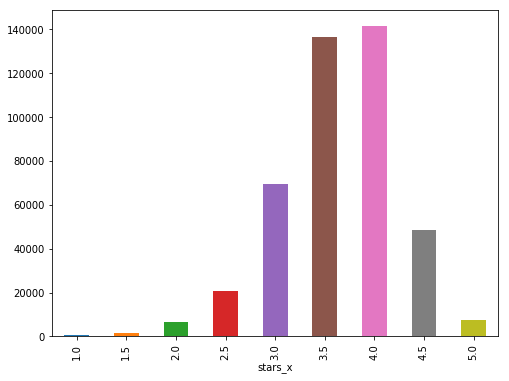

In [25]:
#distribution of restaurant ratings
fig = plt.figure(figsize=(8,6))
df.groupby('stars_x').business_id.count().plot.bar(ylim=0)
plt.show()

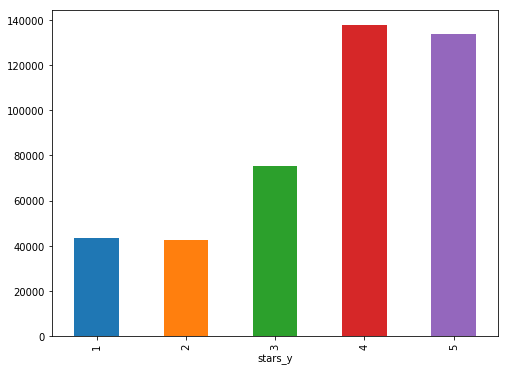

In [24]:
#distribution of reviews
fig = plt.figure(figsize=(8,6))
df.groupby('stars_y').text.count().plot.bar(ylim=0)
plt.show()

In [4]:
# normalize function

wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    #doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I)
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    doc = ''.join(i for i in doc if not i.isdigit())
    return doc

normalize_corpus = np.vectorize(normalize_document)

In [5]:
# new dataframe of just reviews and star ratings

col = ['stars_y', 'text']
df = df[col]
df = df[pd.notnull(df['text'])]

df.columns = ['stars_y', 'text']

df.head()

,stars_y,text
0,5,Hallelujah! I FINALLY FOUND IT! The frozen yog...
1,5,I drop by BnC on a weekly basis to pick up my ...
2,3,"My personally experience here wasn't the best,..."
3,3,37 °C = 98.6°F\r\nKoreatown establisments disp...
4,5,My husband & I visited Toronto from the U.S. f...


In [6]:
# normalize corpus 

norm_df = normalize_corpus(df['text'])
norm_df

array(["hallelujah finally found frozen yogurt launched red mango pinkberry craze states . ( google .) canadian incarnation goes name yogoberri discovered inside tiny korean bakery along bloor street ' k - town . uninitiated , frozen yogurt tart less sweet tcby kind . plain vanilla yogurt ' toppings ; fresh fruit , nuts , cereal ... weird - looking powders never tried . small (  oz .) $  .  +  cents per topping . medium (  oz .) including three toppings $  .  . used eat frozen yogurt time lived korea practically weeping joy reunited today . shameless plea : go eat lots chain multiply open branch near home . thanks ! ( fyi ,  stars yogurt . ' tried anything else bakery .) ** eta : dear fro yo gods , thanks opening blushberry closer home . xoxo , susan c .**",
       "drop bnc weekly basis pick favourite buns korean bread go mid afternoon good popular buns sold . also cakes - best green tea cake . tried bing - soo , dessert ice shavings , milk , red bean fruits . ' simply amazing perfect

In [26]:
header = ["stars_y"]
df.to_csv('output.csv', columns = header, index = False)

In [7]:
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1,2))
features = cv.fit_transform(norm_df)

features.shape

(706731, 9682018)

In [35]:
# binarize reviews
df['stars'] = (df['stars_y'] > 3).astype(int)

labels = df.stars

In [36]:
# build train and test datasets

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)


In [8]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    return predictions


In [38]:
# Naive Bayes
predictions = train_model(naive_bayes.MultinomialNB(), X_train, y_train, X_test)

accuracy = accuracy_score(y_test, predictions)
F1 = f1_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print ("NB:")
print ("Accuracy: ", accuracy)
print ("F1: ", F1)
print ("Precision: ", precision)
print ("Recall: ", recall)

NB:
Accuracy:  0.8496968553566988
F1:  0.8817700428344969
Precision:  0.8400683787049176
Recall:  0.9278281731328876


In [39]:
# Logistic Regression
predictions = train_model(linear_model.LogisticRegression(), X_train, y_train, X_test)

accuracy = accuracy_score(y_test, predictions)
F1 = f1_score(y_test, predictions)
precision = precision_score(y_test, predictions)


TypeError: recall_score() missing 1 required positional argument: 'y_pred'

In [40]:

recall = recall_score(y_test, predictions)

print ("LG:")
print ("Accuracy: ", accuracy)
print ("F1: ", F1)
print ("Precision: ", precision)
print ("Recall: ", recall)

LG:
Accuracy:  0.8749003095762835
F1:  0.8980316501705531
Precision:  0.8845650707095744
Recall:  0.9119145976179323


In [ ]:
# Random Forest
predictions = train_model(ensemble.RandomForestClassifier(), X_train, y_train, X_test)

accuracy = accuracy_score(y_test, predictions)
F1 = f1_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print ("RF:")
print ("Accuracy: ", accuracy)
print ("F1: ", F1)
print ("Precision: ", precision)
print ("Recall: ", recall)

In [ ]:
# Stochastic Gradient Descent
predictions = train_model(SGDClassifier(), X_train, y_train, X_test)

accuracy = accuracy_score(y_test, predictions)
F1 = f1_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print ("SGD:")
print ("Accuracy: ", accuracy)
print ("F1: ", F1)
print ("Precision: ", precision)
print ("Recall: ", recall)